In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Display headings and the first five rows in the data
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [ ]:
# Display the Entire data
url ='http://bit.ly/w-data'
df = pd.read_csv(url)
print(df.to_string())

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
print(df.duplicated()) #To check whether there are any duplicate rows
#False --> Not a duplicate 
#True --> Duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool


In [ ]:
#From above we can analyse that none of the rows are repeated

In [ ]:
print(df.info()) # To get the informtion about the given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [ ]:
#From above we can analyse that there are no empty values present in our dataset

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
# As we can see that "Hours to Hours" and  "Scores to Scores" has correlation as '1' so,we can say that Hours to hours 
# and Scores to Scores has one to one relationship 
# And "Hours to Scores" has 0.97 correlation which is a good correlation in which if we increase one value the other 
# value will also increase

[Text(0.5, 0, 'Hours'), Text(1.5, 0, 'Scores')]

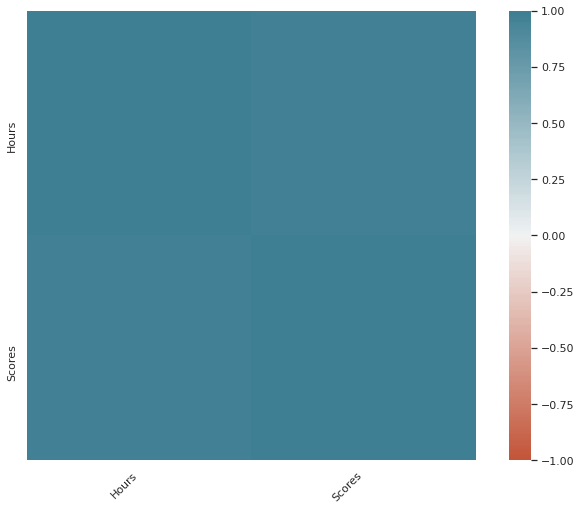

In [ ]:
#visualing the correlation matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})                  
ax=sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

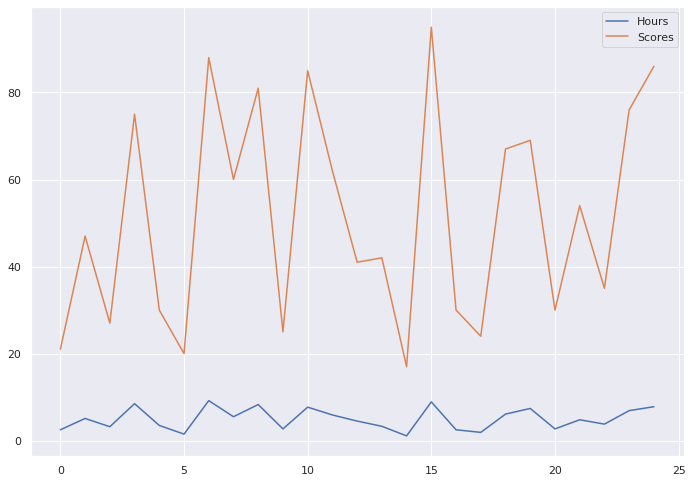

In [ ]:
#Plotting the Hours and Scores
df.plot()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


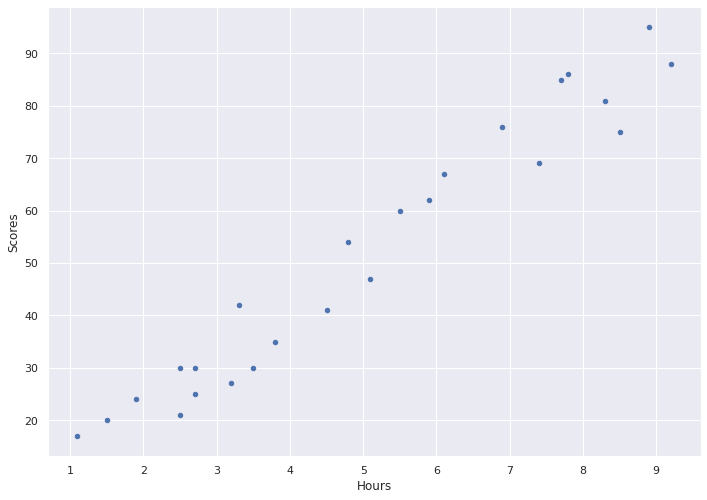

In [ ]:
# To plot the Scatter Plot
df.plot(kind = 'scatter',x = 'Hours', y = 'Scores')
plt.show()

In [ ]:
print(df['Scores'].describe())

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


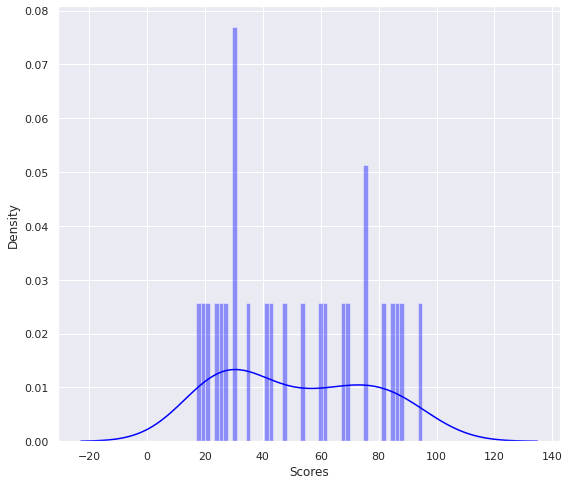

In [ ]:
#Plotting the scores column
plt.figure(figsize=(9,8))                                
sns.distplot(df['Scores'],bins=50,color='blue')

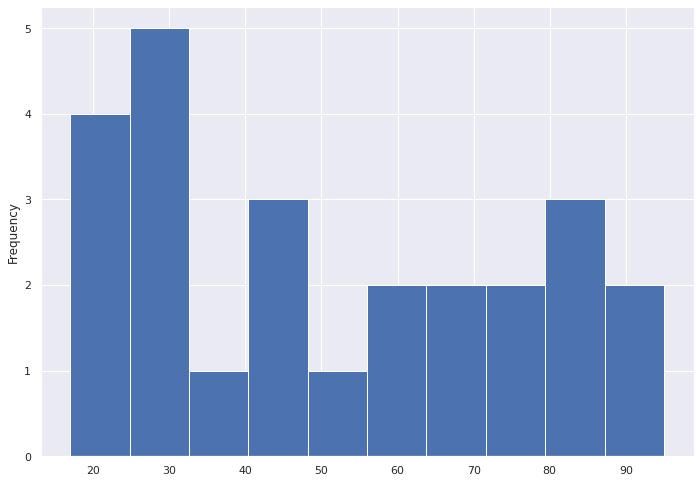

In [ ]:
#Plotting the Histogram for only Scores
df['Scores'].plot(kind = 'hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe87aa308d0>,
      dtype=object)

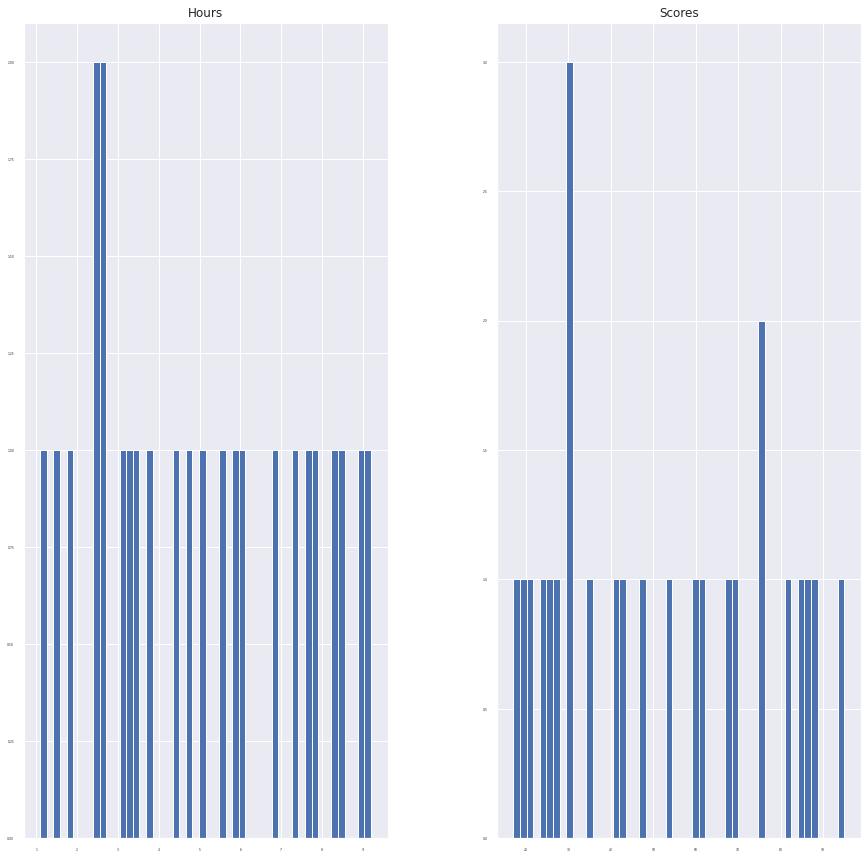

In [ ]:
#Plotting the Histogram for Hours and Scores
df.hist(figsize=(15,15),bins=50,xlabelsize=3,ylabelsize=3)

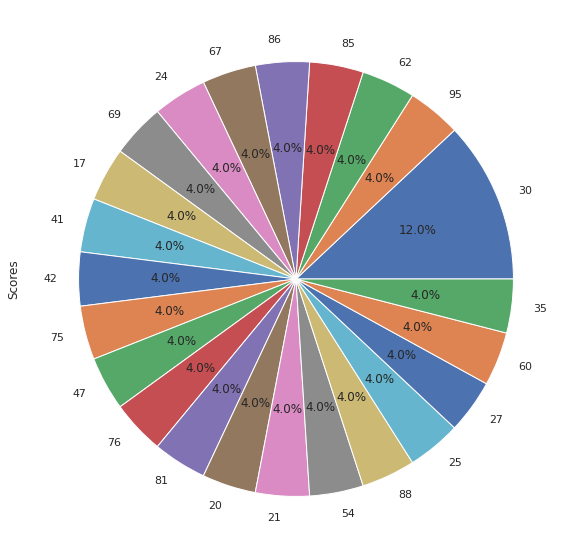

In [ ]:
#visualising the count of each Score
plt.figure(figsize=(10,10))
df['Scores'].value_counts().plot.pie(autopct="%1.1f%%")  

Text(0.5, 1.0, 'Relation Between the Scores and Hours')

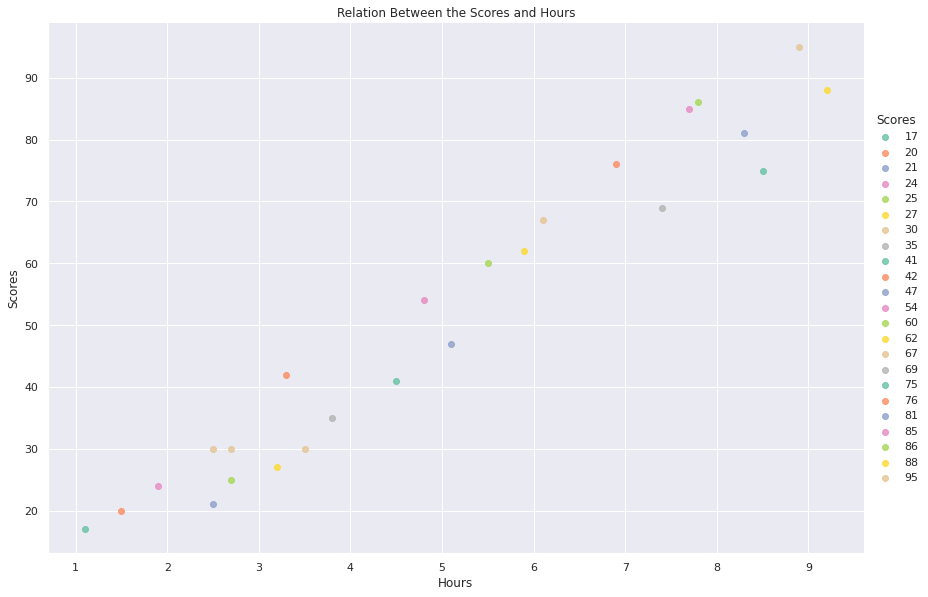

In [ ]:
sns.lmplot(x='Hours',y='Scores',data=df,fit_reg=False,hue='Scores',legend=True ,palette="Set2",height=8,aspect=15/10)
plt.title("Relation Between the Scores and Hours")

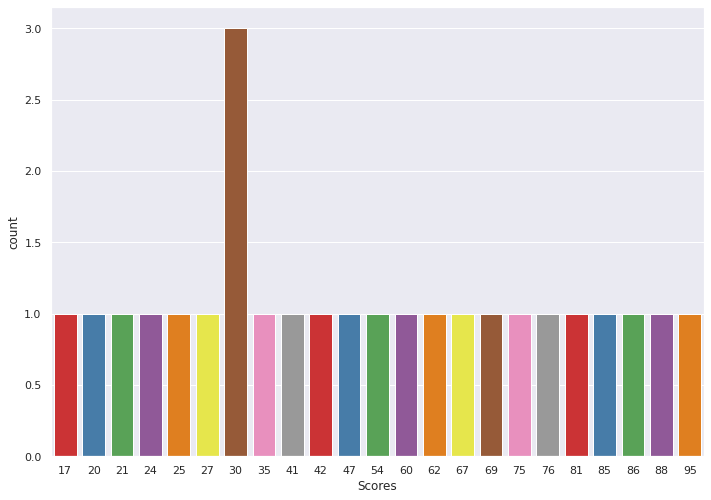

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x='Scores',data=df,palette="Set1")

In [ ]:
pd.crosstab(index=df['Scores'],columns='count') 

col_0,count
Scores,
17,1
20,1
21,1
24,1
25,1
27,1
30,3
35,1
41,1


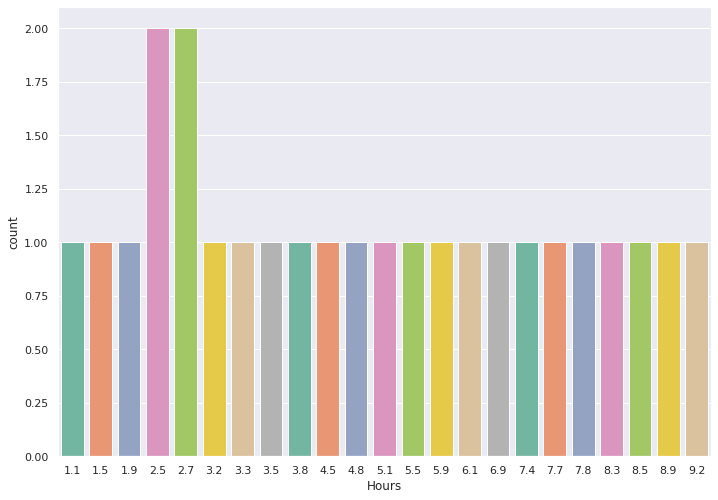

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x='Hours',data=df,palette="Set2")

In [ ]:
pd.crosstab(index=df['Hours'],columns='count') 

col_0,count
Hours,
1.1,1
1.5,1
1.9,1
2.5,2
2.7,2
3.2,1
3.3,1
3.5,1
3.8,1


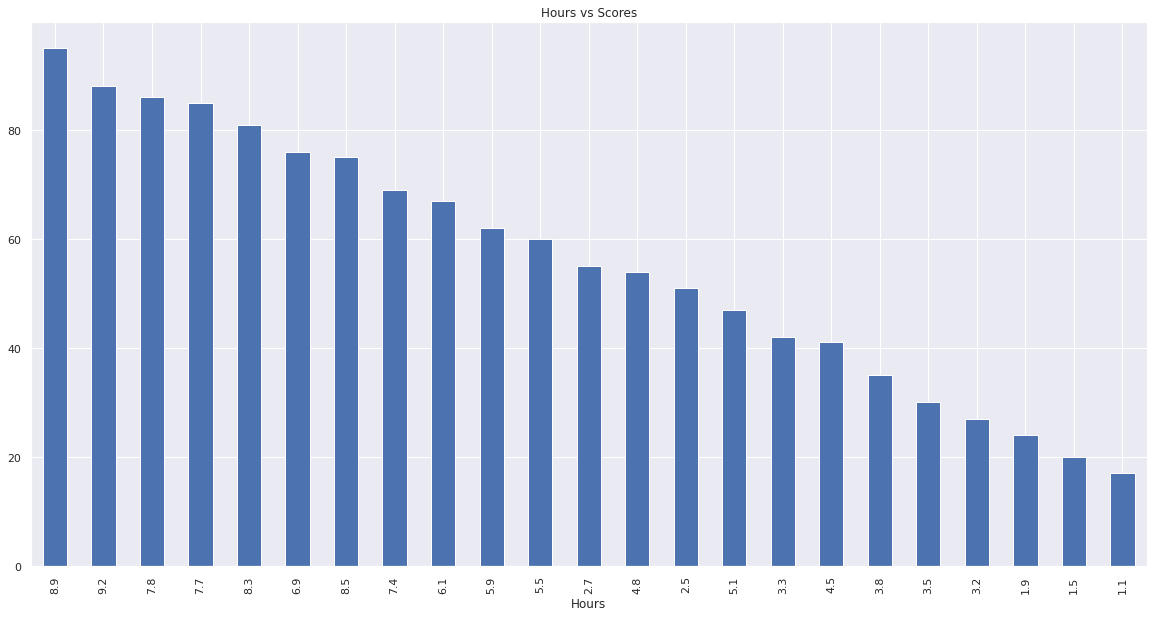

In [ ]:
statewise=df.groupby(['Hours'])['Scores'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Hours vs Scores')
statewise.plot.bar()

# **Insights:**


From the above charts we can conclude that among the given  Scores, "30" is the Score which has been recorded as maximum (i.e., scored by maximum number of players).

We can also conclude that among the given 2.7 and 2.5 hours are the maximum duration of  playing of the Players

From the "Hours vs Scores" graph we can conclude that 8.9 hours duration had maximum Scores

# THANK YOU

# **DONE BY:**
A.HARICHANDANA